In [9]:
#Cell_1.
import pandas as pd 
df = pd.read_csv('salary_1.csv',sep=",")
display(df.head())
df.corr()

,TIME,PUBS,SALARY
0,3,18,51876
1,6,3,54511
2,3,2,53425
3,8,17,61863
4,9,11,52926


,TIME,PUBS,SALARY
TIME,1.000000,0.656655,0.710351
PUBS,0.656655,1.000000,0.587834
SALARY,0.710351,0.587834,1.000000


In [10]:
#Cell_2.
import numpy as np
import pandas as pd

df = pd.read_csv('salary_1.csv',sep=",")
y=df['PUBS']
x=df['SALARY']
z=df['TIME']
y=np.array(y)
x=np.array(x)
z=np.array(z)

import math
def partial_corr(z,x,y):
    correlation_matrix = np.corrcoef((z,x,y))
    r_zx = correlation_matrix[0,1]
    r_zy = correlation_matrix[0,2]
    r_xy = correlation_matrix[1,2]
    r_xy_z = (r_xy-r_zx*r_zy)/(math.sqrt(1-r_zx**2)*math.sqrt(1-r_zy**2))
    return r_xy_z

print("Correlation of x and y is {0}:".format(np.corrcoef(x,y)[0,1]))
print("Partial correlation of x and y is {0}:".format(partial_corr(z,x,y) ))

Correlation of x and y is 0.5878335406973414:
Partial correlation of x and y is 0.22865511189799811:


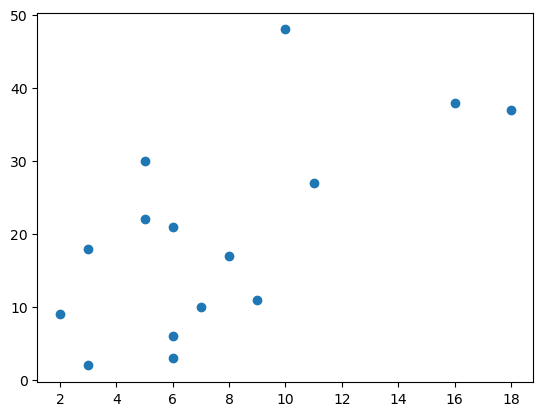

In [11]:
#Cell_3.
#scatter plot.
import matplotlib.pyplot as plt
plt.scatter(z,y)

In [12]:
#Cell_4.
import scipy
from scipy import linalg

def cor2pcor(R):
    inv_cor = linalg.inv(R)
    rows = inv_cor.shape[0]
    regu_1 = 1 / np.sqrt(np.diag(inv_cor))
    regu_2 = np.repeat(regu_1, rows).reshape(rows, rows)
    pcor = (-inv_cor) * regu_1 * regu_2
    np.fill_diagonal(pcor, 1)
    return pcor
pcor = pd.DataFrame(cor2pcor(df.corr()), columns=df.corr().columns, index=df.corr().index)
display(pcor)

,TIME,PUBS,SALARY
TIME,1.000000,0.419892,0.531606
PUBS,0.419892,1.000000,0.228655
SALARY,0.531606,0.228655,1.000000


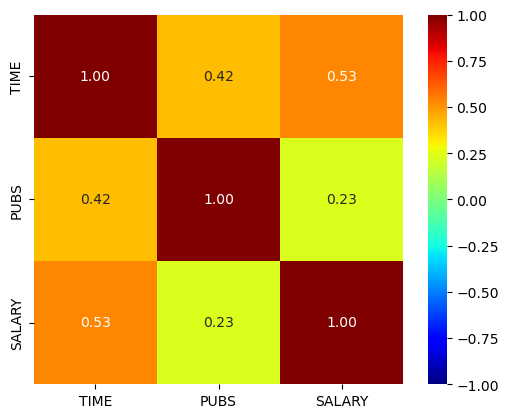

In [13]:
%matplotlib inline
#Cell_5.
import seaborn as sns

sns.heatmap(pcor, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet")
plt.show()